# Laboratory #04 : Template Matching and HOG

At the end of this laboratory, you would get familiarized with

*   Normalized Correlation
*   Histogram of Oriented Gaussian

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

# **Students** (First Name and Last Name)

1.   Marc Gonzalez Vidal
2.   Oriol Miró Lopez-Feliu

---

In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import color, data, exposure, feature, filters, io, transform
import scipy
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Oriol
base_path = '/content/drive/MyDrive/MAI_CV_LAB/labs_4_5/images/'

In [ ]:
# Marc
base_path = '/content/drive/MyDrive/images/'

# Template Matching

## Exercise #1: Normalized correlation

*   Load 'einstein.png' image and use 'template.png' to find the location of the template using normalized cross-correlation. *Hint:match_template function is available in the skimage.feature module.*
*   Visualize the original image, template image and normalized cross-correlation image using matplotlib.

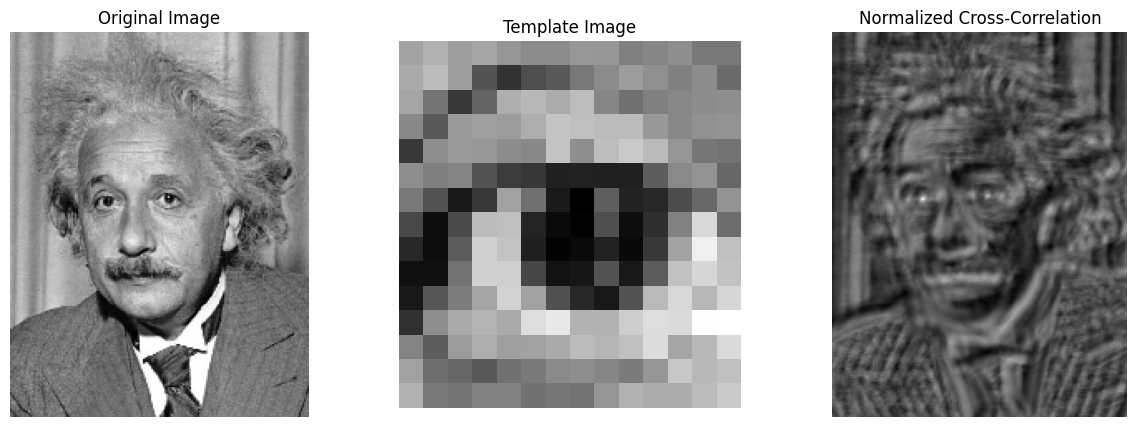

In [4]:
# solution

einstein_img = io.imread(base_path + 'einstein.png', as_gray=True)
template_img = io.imread(base_path + 'template.png', as_gray=True)

result = feature.match_template(einstein_img, template_img)


# visualise

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(einstein_img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(template_img, cmap='gray')
ax[1].set_title('Template Image')
ax[1].axis('off')

ax[2].imshow(result, cmap='gray')
ax[2].set_title('Normalized Cross-Correlation')
ax[2].axis('off')

plt.show()

*   What is the output of the normalized cross-correlation function?

**Solution**

The output is a 2D matrix of correlation scores, with higher values indicating better matches between the template and the image.

The output of match_template function gives the response image with correlation coefficients. Let us visualize the exact location of the match:
*   Create a function to take the normalized cross-correlation image as input and return a bw image
    *   The function should convert the normalized cross-correlation image to a thresholded image.

In [5]:
# solution

def threshold_correlation(correlation_image, threshold=0.8):
  thresholded_img = correlation_image >= threshold
  return thresholded_img


*   Visualize the thresholded image on top of the original image. Show the exact location of the match in red color.
*   *Hint: learn about alpha channels and listed colormaps in matplotlib*

In [6]:
# useful function for our ease

def get_mask_on_image(original_image, thresholded_img):

    mask      = np.zeros_like(original_image)
    positions = np.argwhere(thresholded_img == 1)

    # center the mask! as we otherwise get the top-left corner
    template_height, template_width = template_img.shape
    for (i, j) in positions:
        mask[int(i + template_height/2), int(j + template_width/2)] = 1

    return mask

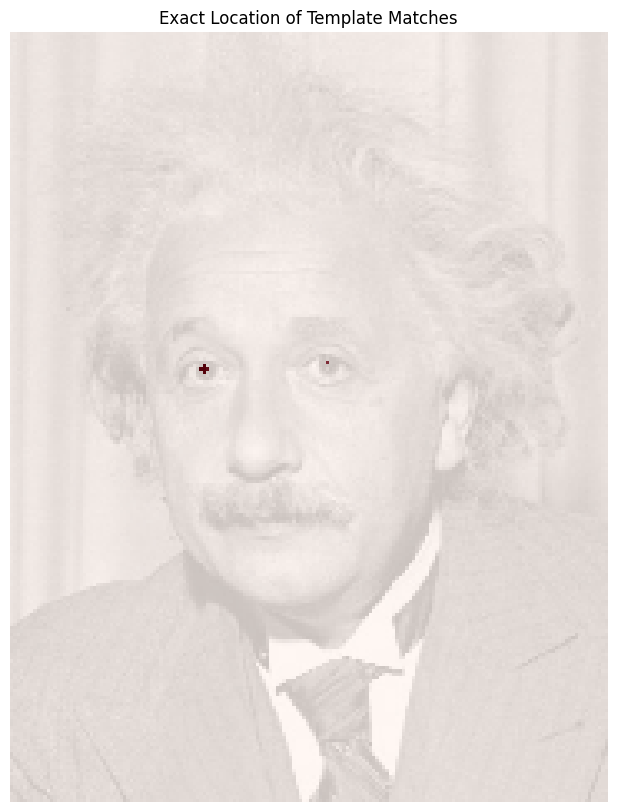

In [14]:
# solution

## this was pretty complicated, as we struggled lining up the mask with the eye... the following code finally worked!

# Result comes from previous computation. We computed threshold = 0.55 after several tries, as it correctly detected BOTH eyes.
thresholded_img = threshold_correlation(result, threshold=0.55)

mask = get_mask_on_image(einstein_img, thresholded_img)


# visualise

plt.figure(figsize=(10, 10))
plt.imshow(einstein_img, cmap='gray')
plt.imshow(mask, cmap='Reds', alpha=0.8)
plt.title('Exact Location of Template Matches')
plt.axis('off')
plt.show()


## Exercise #2: Effect of contrast

*   Load 'einstein_br.png'
*   Perform template matching with the 'template.png' image
*   Visualize the original image, template image, normalized cross-correlation image and the thresholded image using matplotlib.

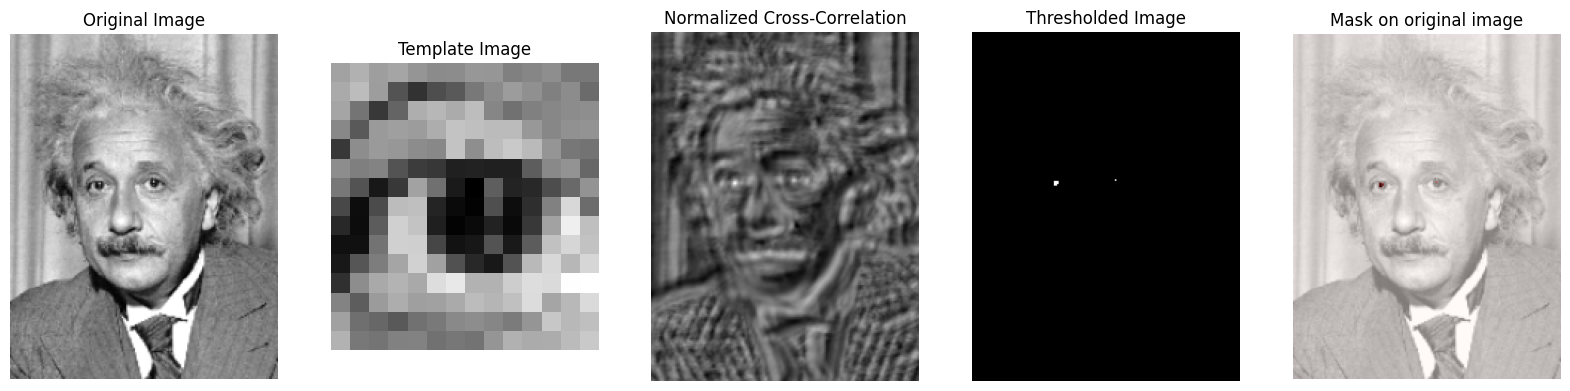

In [15]:
# solution
einstein_img = io.imread(base_path + 'einstein_br.png', as_gray=True)

normalised_cc   = feature.match_template(einstein_img, template_img)
thresholded_img = threshold_correlation(normalised_cc, threshold=0.55)

mask = get_mask_on_image(einstein_img, thresholded_img)

# visualsie

fig, ax = plt.subplots(1, 5, figsize=(20, 5))

ax[0].imshow(einstein_img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(template_img, cmap='gray')
ax[1].set_title('Template Image')
ax[1].axis('off')

ax[2].imshow(normalised_cc, cmap='gray')
ax[2].set_title('Normalized Cross-Correlation')
ax[2].axis('off')

ax[3].imshow(thresholded_img, cmap='gray')
ax[3].set_title('Thresholded Image')
ax[3].axis('off')

ax[4].imshow(einstein_img, cmap='gray')
ax[4].imshow(mask, cmap='Reds', alpha=0.5)
ax[4].set_title('Mask on original image')
ax[4].axis('off')

plt.show()



*   Repeat the above experiment with 'einstein_mask.png' image and visualize the results.

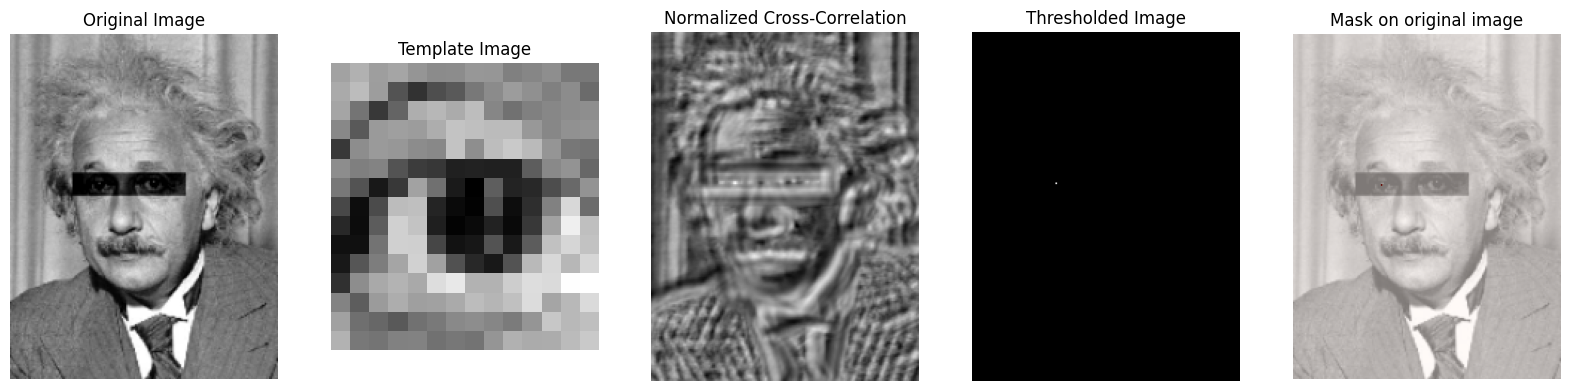

In [ ]:
# solution

einstein_img = io.imread(base_path + 'einstein_mask.png', as_gray=True)

normalised_cc   = feature.match_template(einstein_img, template_img)
thresholded_img = threshold_correlation(normalised_cc, threshold=0.55)

mask = get_mask_on_image(einstein_img, thresholded_img)

# visualise

fig, ax = plt.subplots(1, 5, figsize=(20, 5))

ax[0].imshow(einstein_img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(template_img, cmap='gray')
ax[1].set_title('Template Image')
ax[1].axis('off')

ax[2].imshow(normalised_cc, cmap='gray')
ax[2].set_title('Normalized Cross-Correlation')
ax[2].axis('off')

ax[3].imshow(thresholded_img, cmap='gray')
ax[3].set_title('Thresholded Image')
ax[3].axis('off')

ax[4].imshow(einstein_img, cmap='gray')
ax[4].imshow(mask, cmap='Reds', alpha=0.5)
ax[4].set_title('Mask on original image')
ax[4].axis('off')

plt.show()



*   Do you find any differences in results with respect to contrast changes?
*   Explain your inferences.

**Solution**

**Question 1:** Yes. On the first experiment we could easily detect matches at both eyes, but on the second experiment we only detect a weak matching on one eye. The second image, "einstein_mask", with the change in contrast at the eyes makes finding meaningful matches harder; even so, normalised cross-correlation still achieved a correct match (left eye).

**Question 2:** As previously mentioned, the presence of a mask (contrast change) has impacted the accuracy of template matching. When the a black band covers the eye region, the normalized cross-correlation produces weaker matches compared to the first experiment without the mask. Despite normalized cross correlation not being too sensitive to contrast changes, in our experiments it did make an impact.

...

*   What happens if you change the contrast of the template image?
*   Use 'template_br.png' instead of 'template.png' and repeat the experiment with 'einstein.png'
*   Visualize the results.

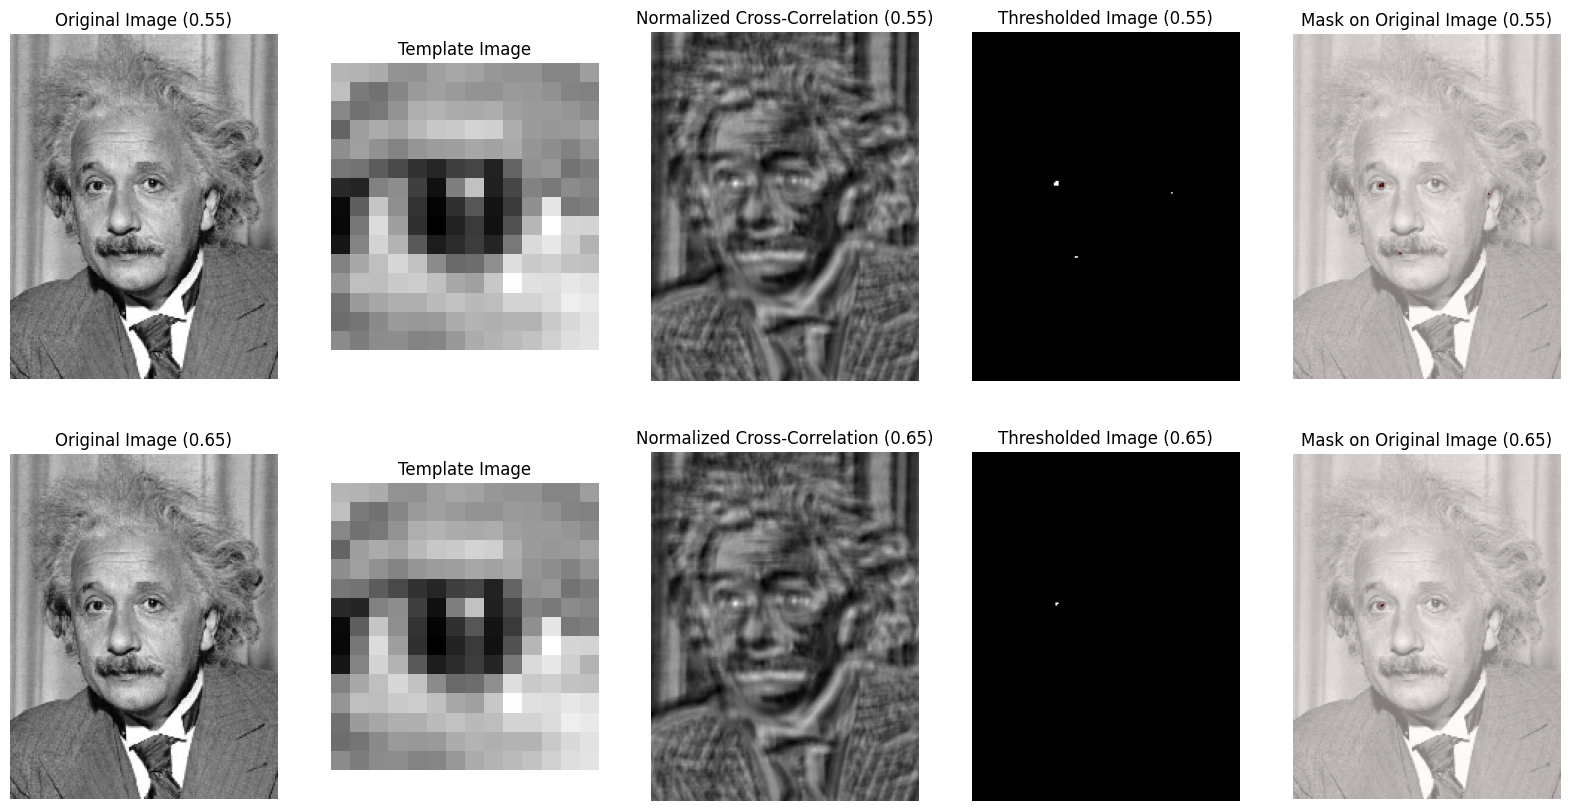

In [16]:
# solution

## NOTE: We compare the previously chosen threshold (0.55) versus the threshold that works with the new contrast (0.65), for completeness

einstein_img  = io.imread(base_path + 'einstein.png', as_gray=True)
template_img  = io.imread(base_path + 'template_br.png', as_gray=True)

# NCC
normalised_cc_055 = feature.match_template(einstein_img, template_img)
normalised_cc_065 = feature.match_template(einstein_img, template_img)

# thresholds
thresholded_img_055 = threshold_correlation(normalised_cc_055, threshold=0.55)
thresholded_img_065 = threshold_correlation(normalised_cc_065, threshold=0.65)

# masks
mask_055 = get_mask_on_image(einstein_img, thresholded_img_055)
mask_065 = get_mask_on_image(einstein_img, thresholded_img_065)


# visualise

fig, ax = plt.subplots(2, 5, figsize=(20, 10))  # Create 2 rows

# row 1: threshold = 0.55
ax[0, 0].imshow(einstein_img, cmap='gray')
ax[0, 0].set_title('Original Image (0.55)')
ax[0, 0].axis('off')

ax[0, 1].imshow(template_img, cmap='gray')
ax[0, 1].set_title('Template Image')
ax[0, 1].axis('off')

ax[0, 2].imshow(normalised_cc_055, cmap='gray')
ax[0, 2].set_title('Normalized Cross-Correlation (0.55)')
ax[0, 2].axis('off')

ax[0, 3].imshow(thresholded_img_055, cmap='gray')
ax[0, 3].set_title('Thresholded Image (0.55)')
ax[0, 3].axis('off')

ax[0, 4].imshow(einstein_img, cmap='gray')
ax[0, 4].imshow(mask_055, cmap='Reds', alpha=0.5)
ax[0, 4].set_title('Mask on Original Image (0.55)')
ax[0, 4].axis('off')

# row 2: threshold = 0.65
ax[1, 0].imshow(einstein_img, cmap='gray')
ax[1, 0].set_title('Original Image (0.65)')
ax[1, 0].axis('off')

ax[1, 1].imshow(template_img, cmap='gray')
ax[1, 1].set_title('Template Image')
ax[1, 1].axis('off')

ax[1, 2].imshow(normalised_cc_065, cmap='gray')
ax[1, 2].set_title('Normalized Cross-Correlation (0.65)')
ax[1, 2].axis('off')

ax[1, 3].imshow(thresholded_img_065, cmap='gray')
ax[1, 3].set_title('Thresholded Image (0.65)')
ax[1, 3].axis('off')

ax[1, 4].imshow(einstein_img, cmap='gray')
ax[1, 4].imshow(mask_065, cmap='Reds', alpha=0.5)
ax[1, 4].set_title('Mask on Original Image (0.65)')
ax[1, 4].axis('off')

plt.show()

**Solution**

When we change the contrast of the template we seem to find more false positives, while also failing to find the right eye (which makes sense, given the template is merely of the left eye). We found that increasing the threshold (e.g. to 0.65) stops this false positives from appearing, showing normalised cross-correlation's strenght when faced with contrast changes. Both options are shown for completeness, as we used a threshold of 0.55 in previous experiments.

## **Exercise #3: Effect of rotation**

*   Load 'einstein.png' image and 'template.png' image.
*   Rotate the template by 10&deg;, 20&deg;, 30&deg; and perform template matching.
*   Visualize the original image, template image and the thresholded normalized cross-correlation image for all the different templates.
*   *Hint: rotate function is available in skimage.transform module*

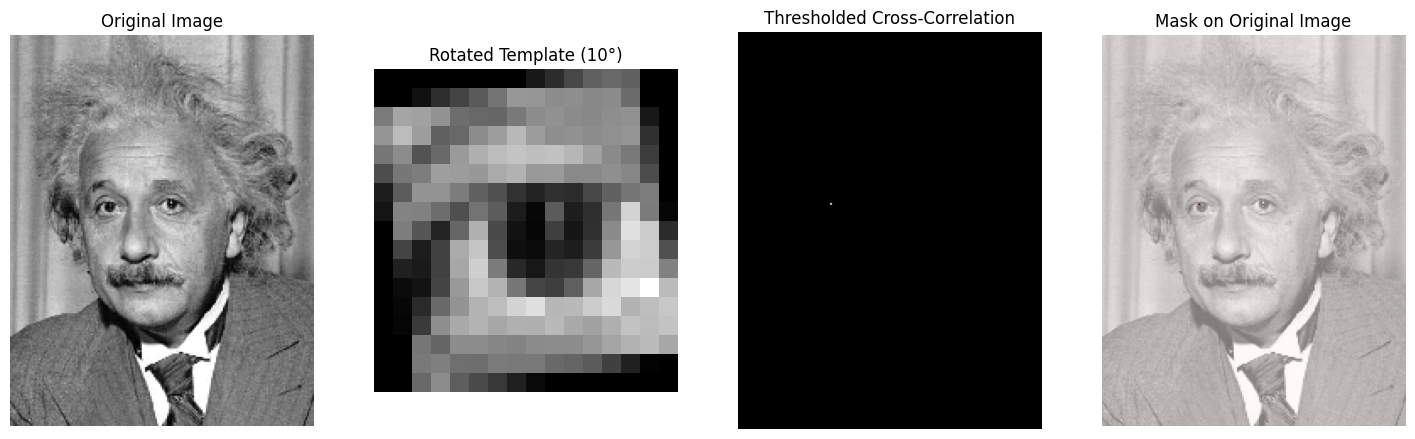

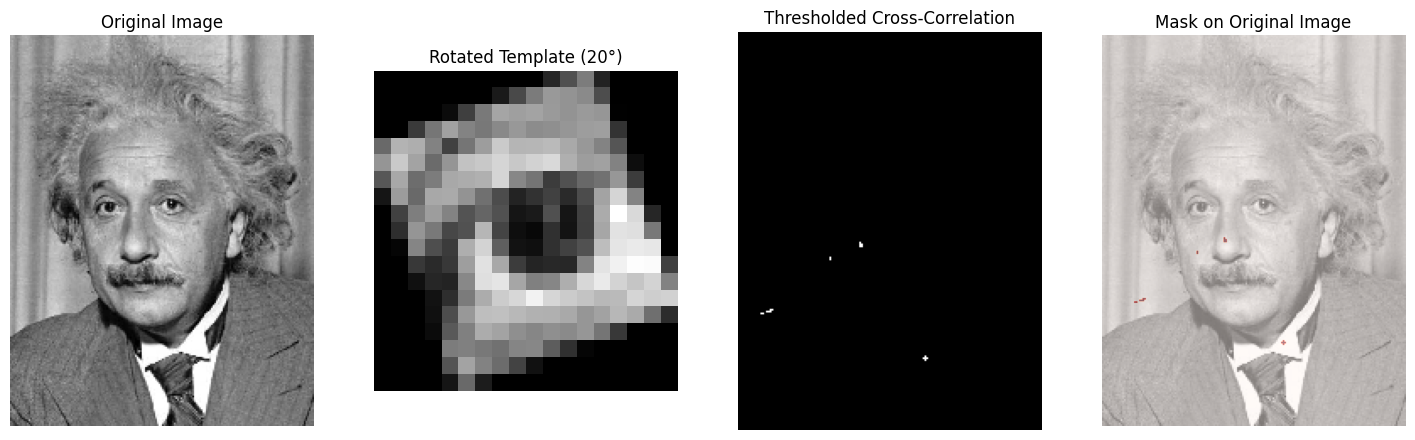

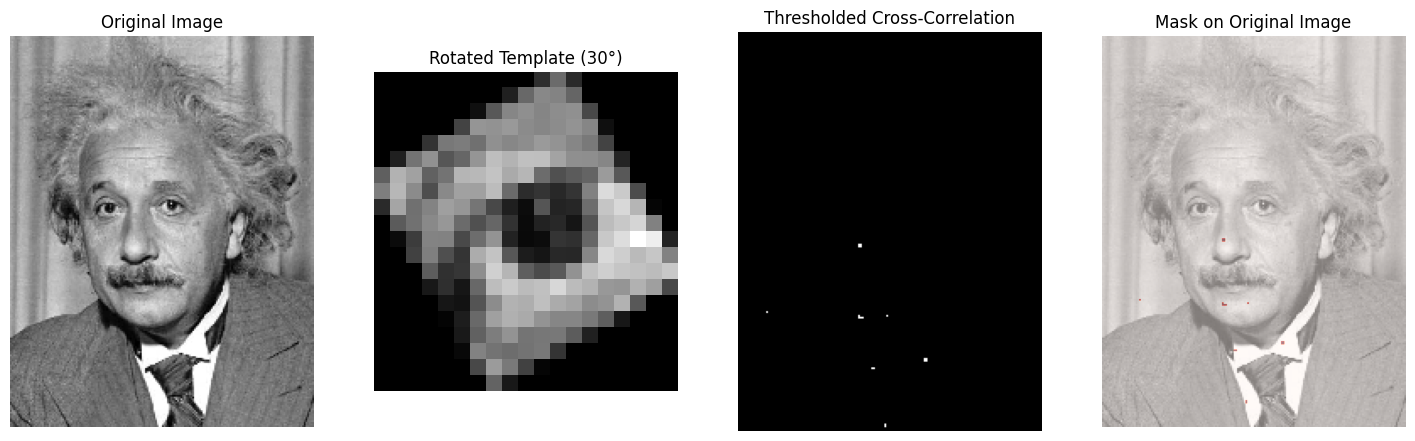

In [17]:
# solution

## we assume the function "threshold_correlation" from previous exercices

einstein_img = io.imread(base_path + 'einstein.png', as_gray=True)
template_img = io.imread(base_path + 'template.png', as_gray=True)

angles = [10, 20, 30]

for angle in angles:
    # rotate
    rotated_template = transform.rotate(template_img, angle, resize=True)

    # match
    result = feature.match_template(einstein_img, rotated_template)

    # threshold (we had to decrease to find any match, 0 matches at previously used 0.55)
    thresholded_result = threshold_correlation(result, threshold=0.45)

    # mask
    mask = get_mask_on_image(einstein_img, thresholded_result)


    # visualize

    fig, ax = plt.subplots(1, 4, figsize=(18, 6))

    ax[0].imshow(einstein_img, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(rotated_template, cmap='gray')
    ax[1].set_title(f'Rotated Template ({angle}°)')
    ax[1].axis('off')

    ax[2].imshow(thresholded_result, cmap='gray')
    ax[2].set_title('Thresholded Cross-Correlation')
    ax[2].axis('off')

    ax[3].imshow(einstein_img, cmap='gray')
    ax[3].imshow(mask, cmap='Reds', alpha=0.5)
    ax[3].set_title('Mask on Original Image')
    ax[3].axis('off')

    plt.show()

*   What do you infer with respect to rotation?

**Solution**

As we studied in theory classes, normalised cross-correlation template matching is not invariant to rotation. In the current experiment we can see how we barely get the correct match at a 10º rotation, and after that (20º, 30º rotations) we only obtain false positives. We also had to decrease our threshold (0.55 to 0.45), as otherwise we would find no match at all, even at a 10º rotation.

# Histogram of Oriented Gaussians

## Exercise #1: HOG Image Visualization

*   Load 'astronaut' image from the data module.
*   Apply hog over the image with default parameters. *Hint: hog function is available in skimage.feature module.*
*   Visualize the original image and the hog_image using matplotlib


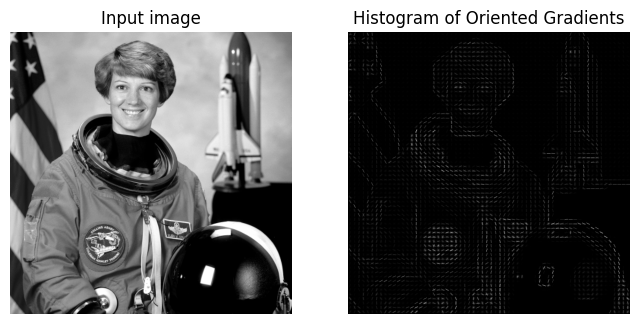

In [23]:
# solution
image = data.astronaut()

image = color.rgb2gray(image)

fd, hog_image = feature.hog(
    image,
    visualize=True
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

*   Explain the algorithm behind HOG



**Solution**

The **HOG algorithm** can be divided into the following sub-tasks:

1. The gradients of each pixel are computed along both the X and Y axes.

2. The image is split into cells, and a histogram of gradient directions is calculated in each cell. To create the histogram, we compute two values: the **magnitude** and the **direction**. The magnitude can be calculated as $\sqrt{V_x^2 + V_y^2}$ and the orientation as $\arctan\left(\frac{V_y}{V_x}\right)$. Each magnitude contributes to its corresponding orientation bin.

3. To reduce sensitivity to lighting changes, normalization across blocks is performed.

4. All normalized histograms are concatenated to form the feature vector.

*   What do you infer from the parameters
    *   orientation
    *   pixels_per_cell


**Solution**

**orientation** refers to the number of bins used to divide the $360^\circ$ range of gradient directions (or $180^\circ$ if the gradient sign is not considered) when computing the histogram.

**pixels_per_cell** define the dimensions of each cell, which divides the image into smaller regions where the histogram is computed locally.

...

*   Change the value of orientation (try atleast 3 different values) and compare the hog_image using matplotlib subplot.

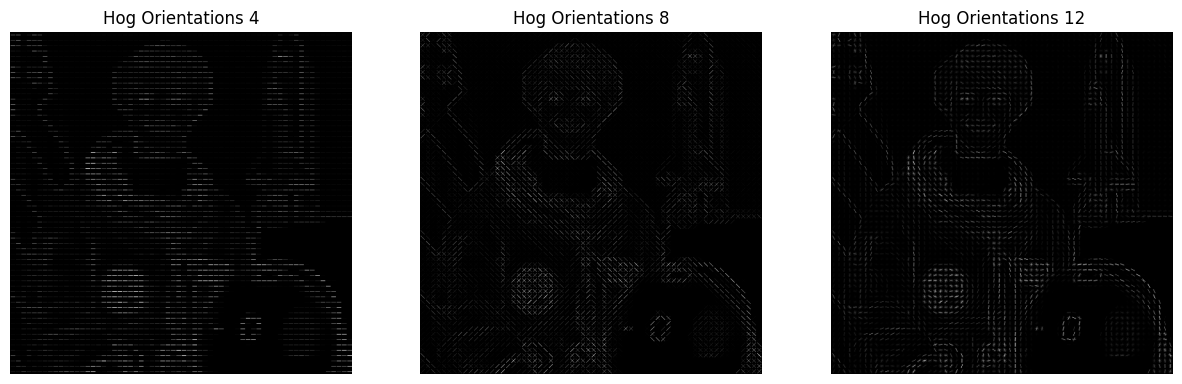

In [22]:
# solution
hog_images = [0]*3

for i, orientation in enumerate([1, 2, 8]):

  _, hog_images[i] = feature.hog(
      image,
      orientations=orientation,
      visualize=True
  )

  #hog_images[i] = exposure.rescale_intensity(hog_images[i], in_range=(0, 10))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(hog_images[0], cmap=plt.cm.gray)
ax1.set_title('Hog Orientations 4')

ax2.axis('off')
ax2.imshow(hog_images[1], cmap=plt.cm.gray)
ax2.set_title('Hog Orientations 8')

ax3.axis('off')
ax3.imshow(hog_images[2], cmap=plt.cm.gray)
ax3.set_title('Hog Orientations 12')

plt.show()



*   What is the role of block normalization in HoG?
*   What are the different methods available in block normalization fo skimage?

**Solution**

**Question 1:**

The role of block normalization in HOG is to mitigate the effects of variations in lighting and high contrast, ensuring that the features extracted are more robust and invariant to these changes.

**Question 2:**

- **L1**  
  Normalization using L1-norm.

- **L1-sqrt**  
  Normalization using L1-norm, followed by square root.

- **L2**  
  Normalization using L2-norm.

- **L2-Hys**  
  Normalization using L2-norm, followed by limiting the maximum values to 0.2 (Hys stands for hysteresis) and renormalization using L2-norm.




  ...


*   The hog function in skimage returns feature descriptors and hog image. Explain each dimension of the feature descriptor output

**Solution:**


The feature descriptor is a 1-D vector that contains the HOG feature vector. The length of this vector can be computed as follows:

### Parameters:
  - pixels_per_cell
  - cells_per_block
  - orientations

### Steps:
 1. Compute the number of cells in an image along both axes:
    - nb_cells_x = img_width // pixels_per_cell[1]  
    - nb_cells_y = img_height // pixels_per_cell[0]

 2. Compute the number of blocks per dimension:
    - nb_blocks_x = (nb_cells_x - cells_per_block[1]) + 1
    - nb_blocks_y = (nb_cells_y - cells_per_block[0]) + 1
  
 3. Compute the total blocks:
    - total_blocks = nb_blocks_x * nb_blocks_y

 4. Compute the feature length per block:
    - feature_length_per_block = cells_per_block[0] * cells_per_block[1] * orientations

 5. Compute the feature length across all blocks:
    - feature_descriptor_length = total_blocks * feature_length_per_block


## Exercise #2: Pedestrian detection

*   Read the template ('person_template.png') and obtain its HOG descriptor (try different values for the parameters and get the optimal value)
*   Visualize the original image and the hog_image using matplotlib.
*   Show different parameter selection steps also using matplotlib.
*   How did you select the optimal value?

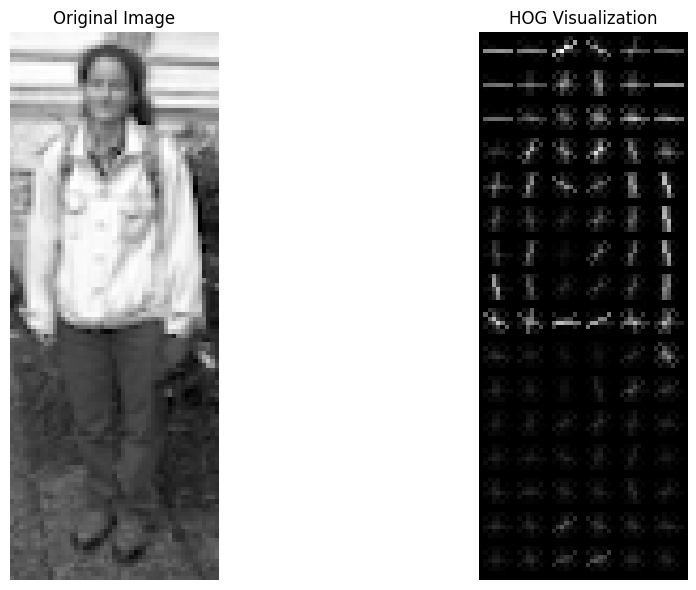

In [25]:
# solution
pedestrian_template = io.imread(base_path + 'person_template.bmp')[:,:,:3]
pedestrian_template = color.rgb2gray(pedestrian_template)

fd, hog_image = feature.hog(
    pedestrian_template,
    visualize=True
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(pedestrian_template, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(hog_image, cmap='gray')
ax2.set_title('HOG Visualization')
ax2.axis('off')

plt.tight_layout()
plt.show()

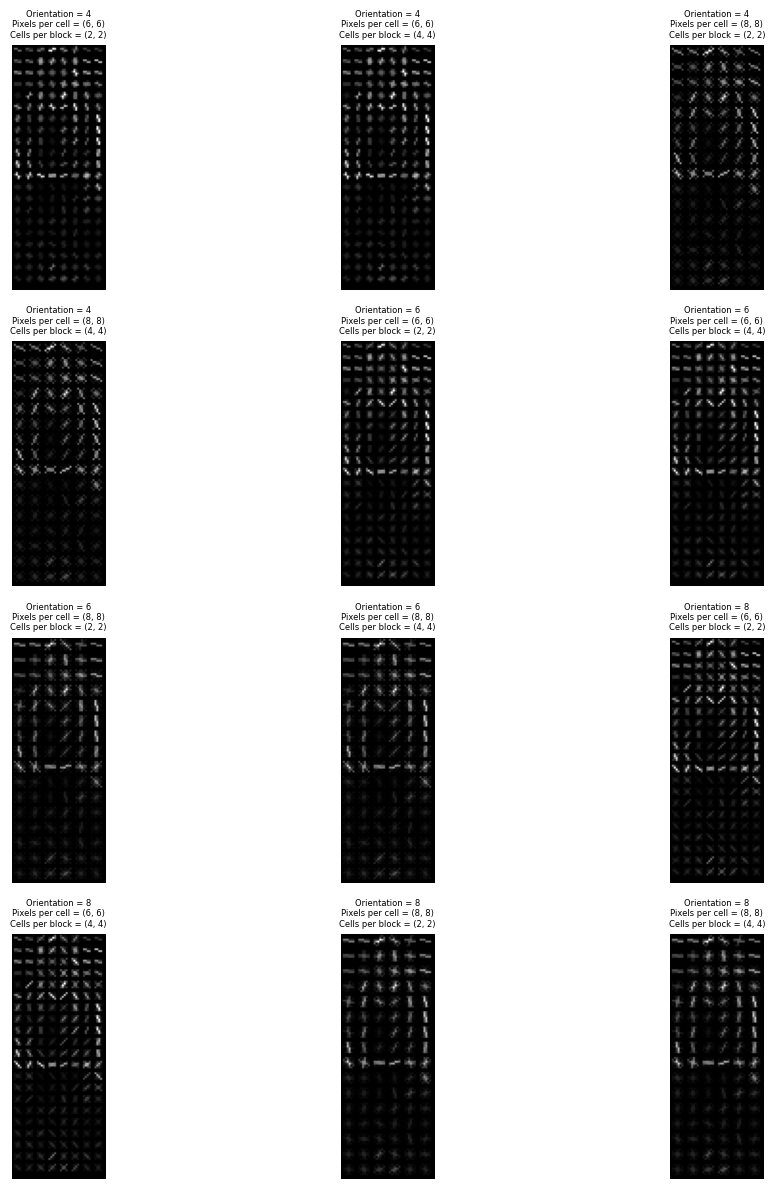

In [ ]:
hog_images = [None]*12

# Try different parameters
orientation_list = [4, 6, 8]
pixels_per_cell_list = [(6, 6), (8, 8)]
cells_per_block_list = [(2, 2), (4, 4)]

index = 0

for i, orientation in enumerate(orientation_list):
    for j, pixels_per_cell in enumerate(pixels_per_cell_list):
        for k, cells_per_block in enumerate(cells_per_block_list):
            _, hog_image = feature.hog(
                pedestrian_template,
                orientations=orientation,
                pixels_per_cell=pixels_per_cell,
                cells_per_block=cells_per_block,
                visualize=True
            )
            hog_images[index] = hog_image
            index += 1

fig, axs = plt.subplots(4, 3, figsize=(12, 12))

axs = axs.ravel()

for idx, hog_image in enumerate(hog_images):
    orientation = orientation_list[idx // (len(pixels_per_cell_list) * len(cells_per_block_list))]
    pixels_per_cell = pixels_per_cell_list[(idx // len(cells_per_block_list)) % len(pixels_per_cell_list)]
    cells_per_block = cells_per_block_list[idx % len(cells_per_block_list)]

    axs[idx].imshow(hog_image, cmap='gray')
    axs[idx].axis('off')
    axs[idx].set_title(f'Orientation = {orientation}\nPixels per cell = {pixels_per_cell}\nCells per block = {cells_per_block}', fontsize=6)

plt.tight_layout()
plt.show()

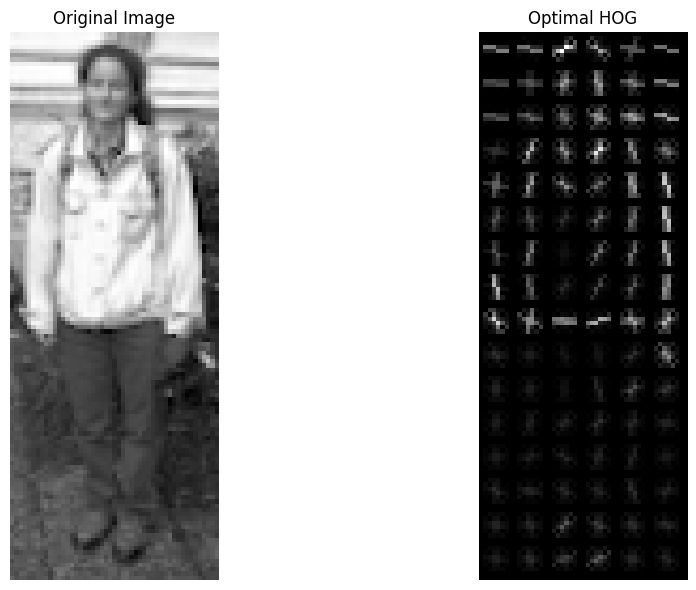

In [26]:
pedestrian_template = io.imread(base_path + 'person_template.bmp')[:,:,:3]
pedestrian_template = color.rgb2gray(pedestrian_template)

optimal_orientations = 8
optimal_pixels_per_cell = (8,8)
optimal_cells_per_block = (4,4)

template_fd, hog_image = feature.hog(
    pedestrian_template,
    orientations=optimal_orientations,
    pixels_per_cell=optimal_pixels_per_cell,
    cells_per_block=optimal_cells_per_block,
    visualize=True
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(pedestrian_template, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(hog_image, cmap='gray')
ax2.set_title('Optimal HOG')
ax2.axis('off')

plt.tight_layout()
plt.show()


*   Read the folder 'pedestrians' from the images folder.
*   For each image, apply sliding window, to get the hog descriptors (Use a step size of 5 pixels for the sliding window)
*   Use euclidean distance or dot product to compare the descriptors
*   Visualize the location of the image that is most similar to the person_template using the selected metric in a matplotlib subplot*


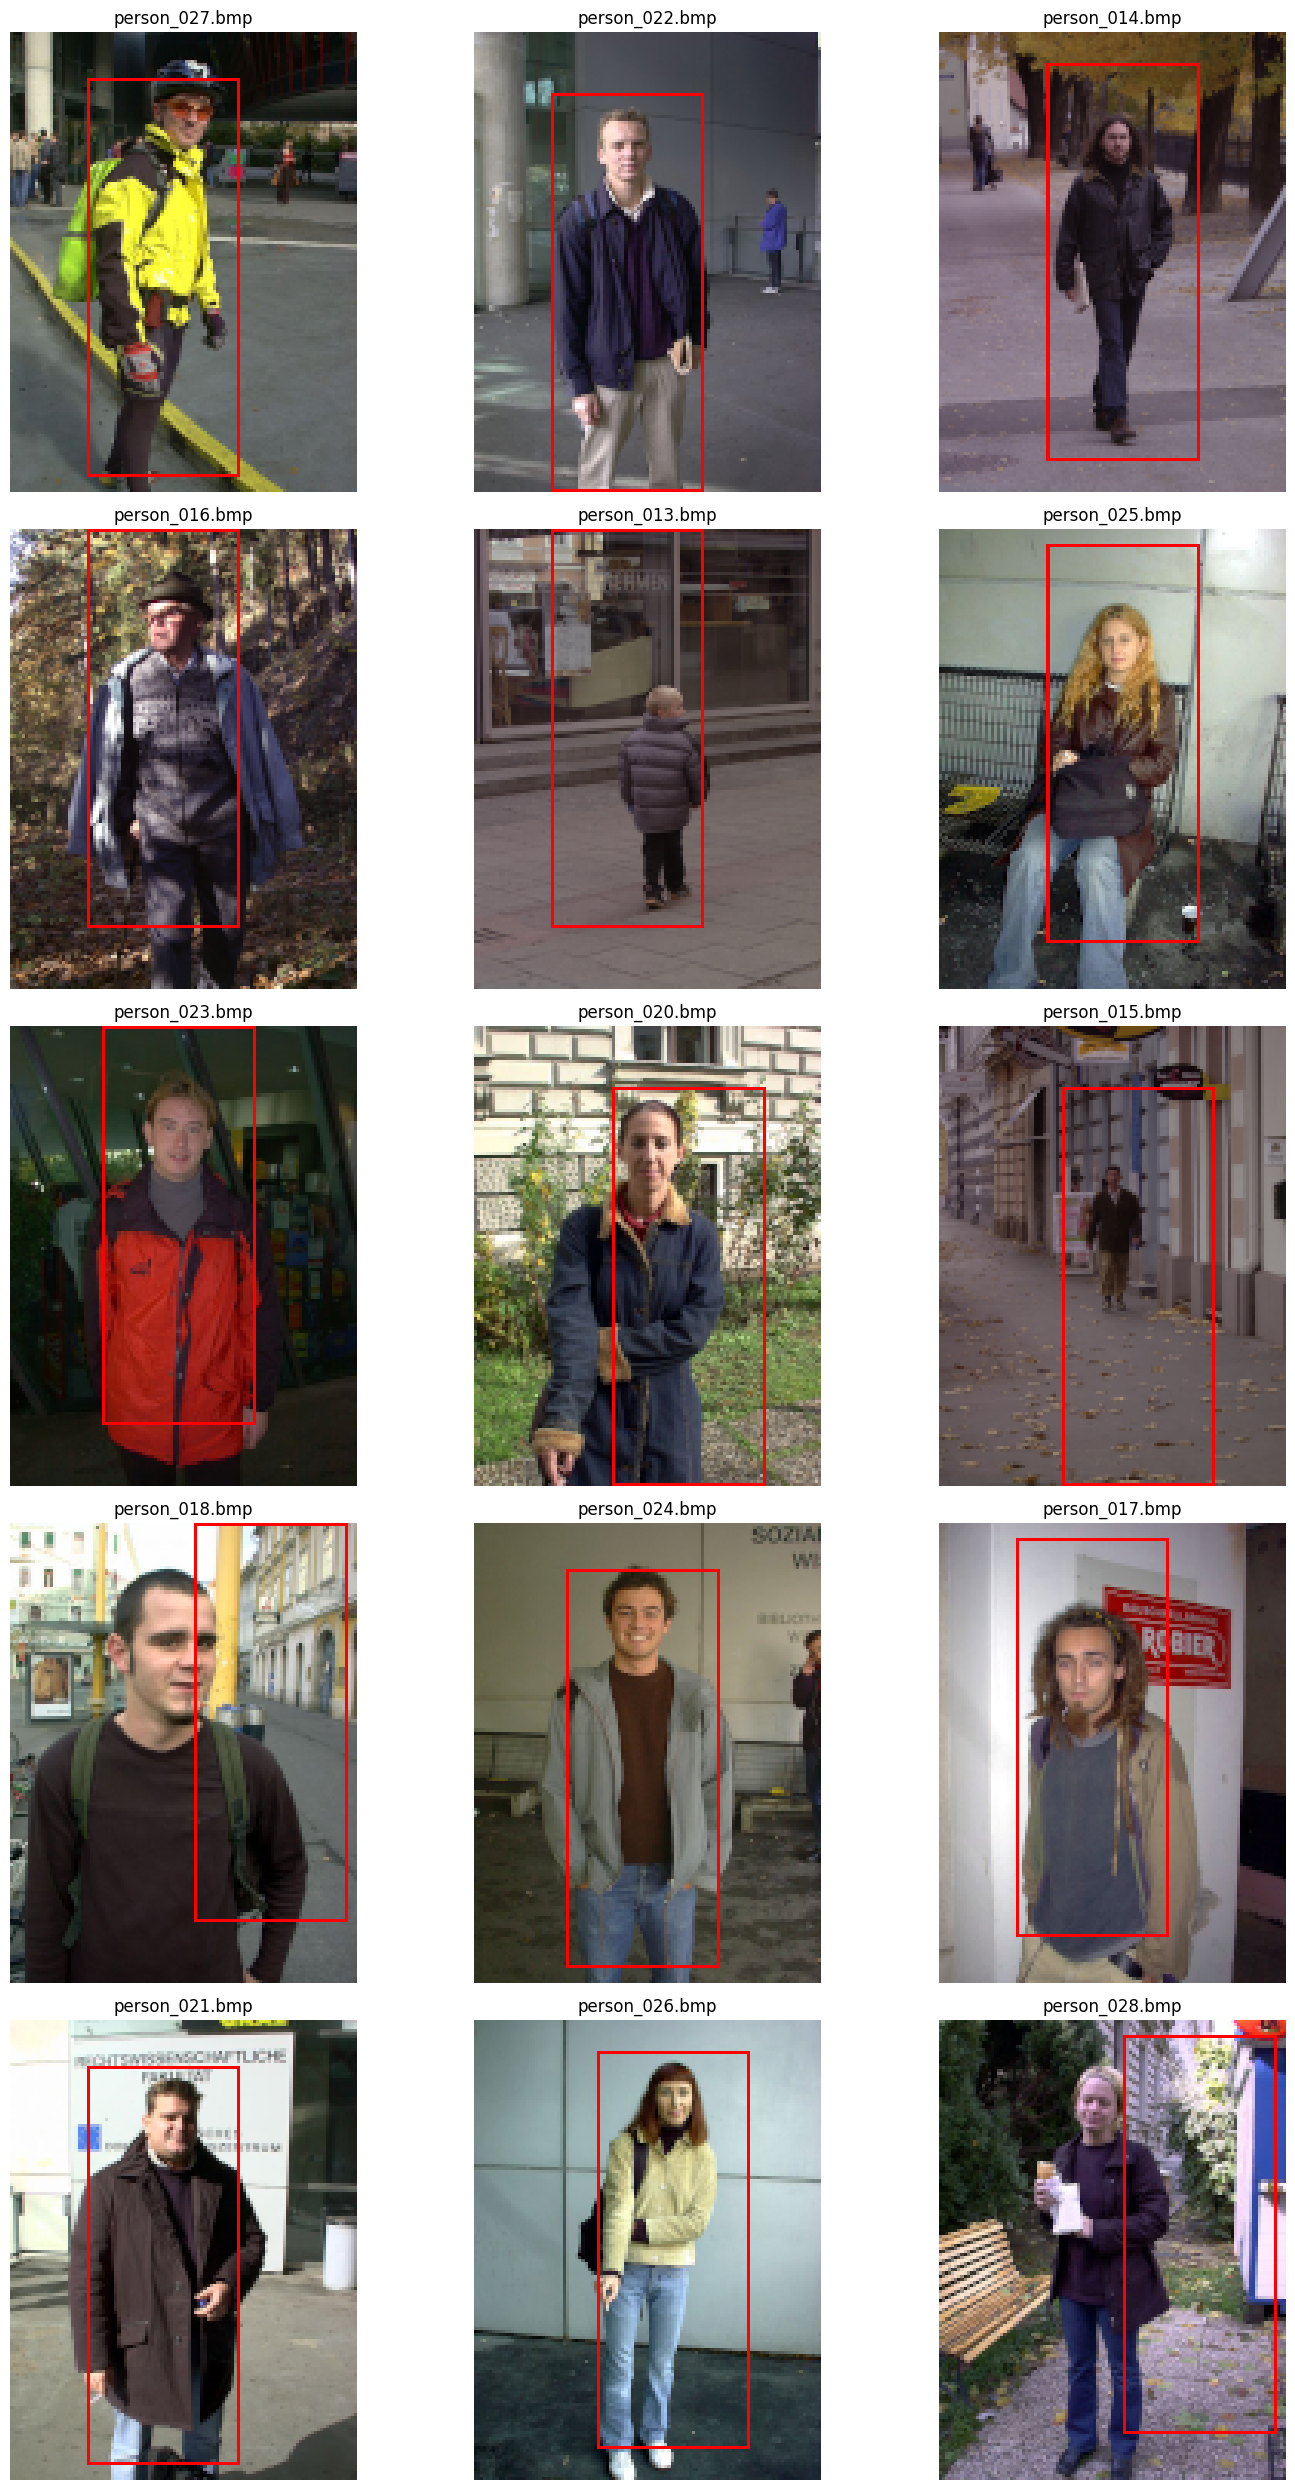

In [ ]:
# solution

step_size = 5

img_path = base_path + "pedestrians/"

list_images_names = [file_name for file_name in os.listdir(img_path) if file_name.endswith('.bmp')]

template_height, template_width = pedestrian_template.shape[:2]

num_images = len(list_images_names)
cols = 3
rows = num_images // cols + (num_images % cols != 0)

fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))

axs = axs.ravel()

for idx, image_name in enumerate(list_images_names):

  image = io.imread(img_path + image_name)[:, :, :3]
  gray_image = color.rgb2gray(image)

  min_dist = np.inf

  best_dist_pos = (0,0)

  img_height, img_width = gray_image.shape[:2]

  for i in range(0, img_height-template_height, step_size):
    for j in range(0, img_width-template_width, step_size):

      img_slice = gray_image[i:i+template_height, j:j+template_width]

      fd, hog_image = feature.hog(
          img_slice,
          orientations=optimal_orientations,
          pixels_per_cell=optimal_pixels_per_cell,
          cells_per_block=optimal_cells_per_block,
          visualize=True
      )

      distance = np.linalg.norm(fd - template_fd)

      if distance < min_dist:
        min_dist = distance
        best_dist_pos = (i, j)

  detection_img = cv2.rectangle(image, (best_dist_pos[1], best_dist_pos[0]), (best_dist_pos[1] + template_width, best_dist_pos[0] + template_height), (255, 0, 0), 1)

  axs[idx].imshow(detection_img)
  axs[idx].axis('off')
  axs[idx].set_title(image_name)

for i in range(num_images, rows * cols):
  fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

*   Count the failures and discuss the possible reason for failure for each image.

**Solution**

We have only two images that clearly fail. There are a few others that might be debatable, but since the majority of the body is within the detection range, we accept them as valid.

The first image we consider a failure is `person_018.bmp`. We believe this is due to template (or window) size. As the person is very close to the camera, their body appears large, making it difficult for the entire body to fit within the template size.

The second failing image is `person_028.bmp`. The reason for this failure isn’t entirely clear. Our intuition suggests that the HOG of the slice might resemble the template because of the shapes present in this part of the image. The tree in the background has a similar shape to the head and body, while the grass and tree have roughly the same tonality. Additionally, the transition to the blue/white house, along with the woman’s arm and part of her leg, could be mistaken as the end of the body in the HOG. This is why we believe the detection fails.

*   Compare template matching and HOG.
*   What are the advantages of HOG over template matching algorithm.

**Solution**

**Question 1:**

In template matching, the raw pixels of the image are compared directly to another image, whereas in HOG, features are computed from the image (specifically, the histogram of gradients), and it is these features (not the raw image) that are compared.

**Question 2:**

The first advantage is that is more robust to lighting changes and noise because it focuses on gradient orientations rather than raw pixel values. This improve the performance capturing the shape and structure of objects. Moreover, HOG can tolerate some scale and perspective variations, making it suitable for detecting objects at different sizes while template matching requires exact pixel matches and is sensitive to variations, making it less effective for complex objects with detailed shapes and textures.


---

# **End of P4: Template Matching and HOG**

This notebook is part of **Deliverable 2**

Deadline for Deliverable 2 (P4 and P5) submission in CampusVirtual is: **Monday, the 28th of October, 2024**
